In [10]:
cd /content/drive/MyDrive/EDA_IMB/

/content/drive/MyDrive/EDA_IMB


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv('melb_data.csv')
data = df[['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
data.head()

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,1480000.0,2,2.0,1.0,1.0,202.0,NaN,NaN
1,1035000.0,2,2.0,1.0,0.0,156.0,79.0,1900.0
2,1465000.0,3,3.0,2.0,0.0,134.0,150.0,1900.0
3,850000.0,3,3.0,2.0,1.0,94.0,NaN,NaN
4,1600000.0,4,3.0,1.0,2.0,120.0,142.0,2014.0


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 1 to 13579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6830 non-null   float64
 1   Rooms         6830 non-null   int64  
 2   Bedroom2      6830 non-null   float64
 3   Bathroom      6830 non-null   float64
 4   Car           6830 non-null   float64
 5   Landsize      6830 non-null   float64
 6   BuildingArea  6830 non-null   float64
 7   YearBuilt     6830 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 480.2 KB


In [13]:
data.describe()

,Price,Rooms,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000
mean,1.075684e+06,2.937997,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217
std,6.393107e+05,0.955748,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762
min,8.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,6.500000e+05,2.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000
50%,9.030000e+05,3.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000
75%,1.330000e+06,3.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000
max,9.000000e+06,10.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000


In [38]:
data = data.drop(data[data['YearBuilt'] < 1800].index, axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


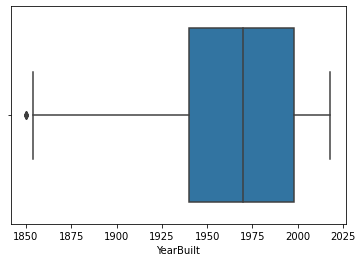

In [39]:
sns.boxplot(data.YearBuilt)

In [43]:
data = data.dropna()

In [44]:
df.shape

(13580, 21)

In [45]:
data.shape

(6719, 8)

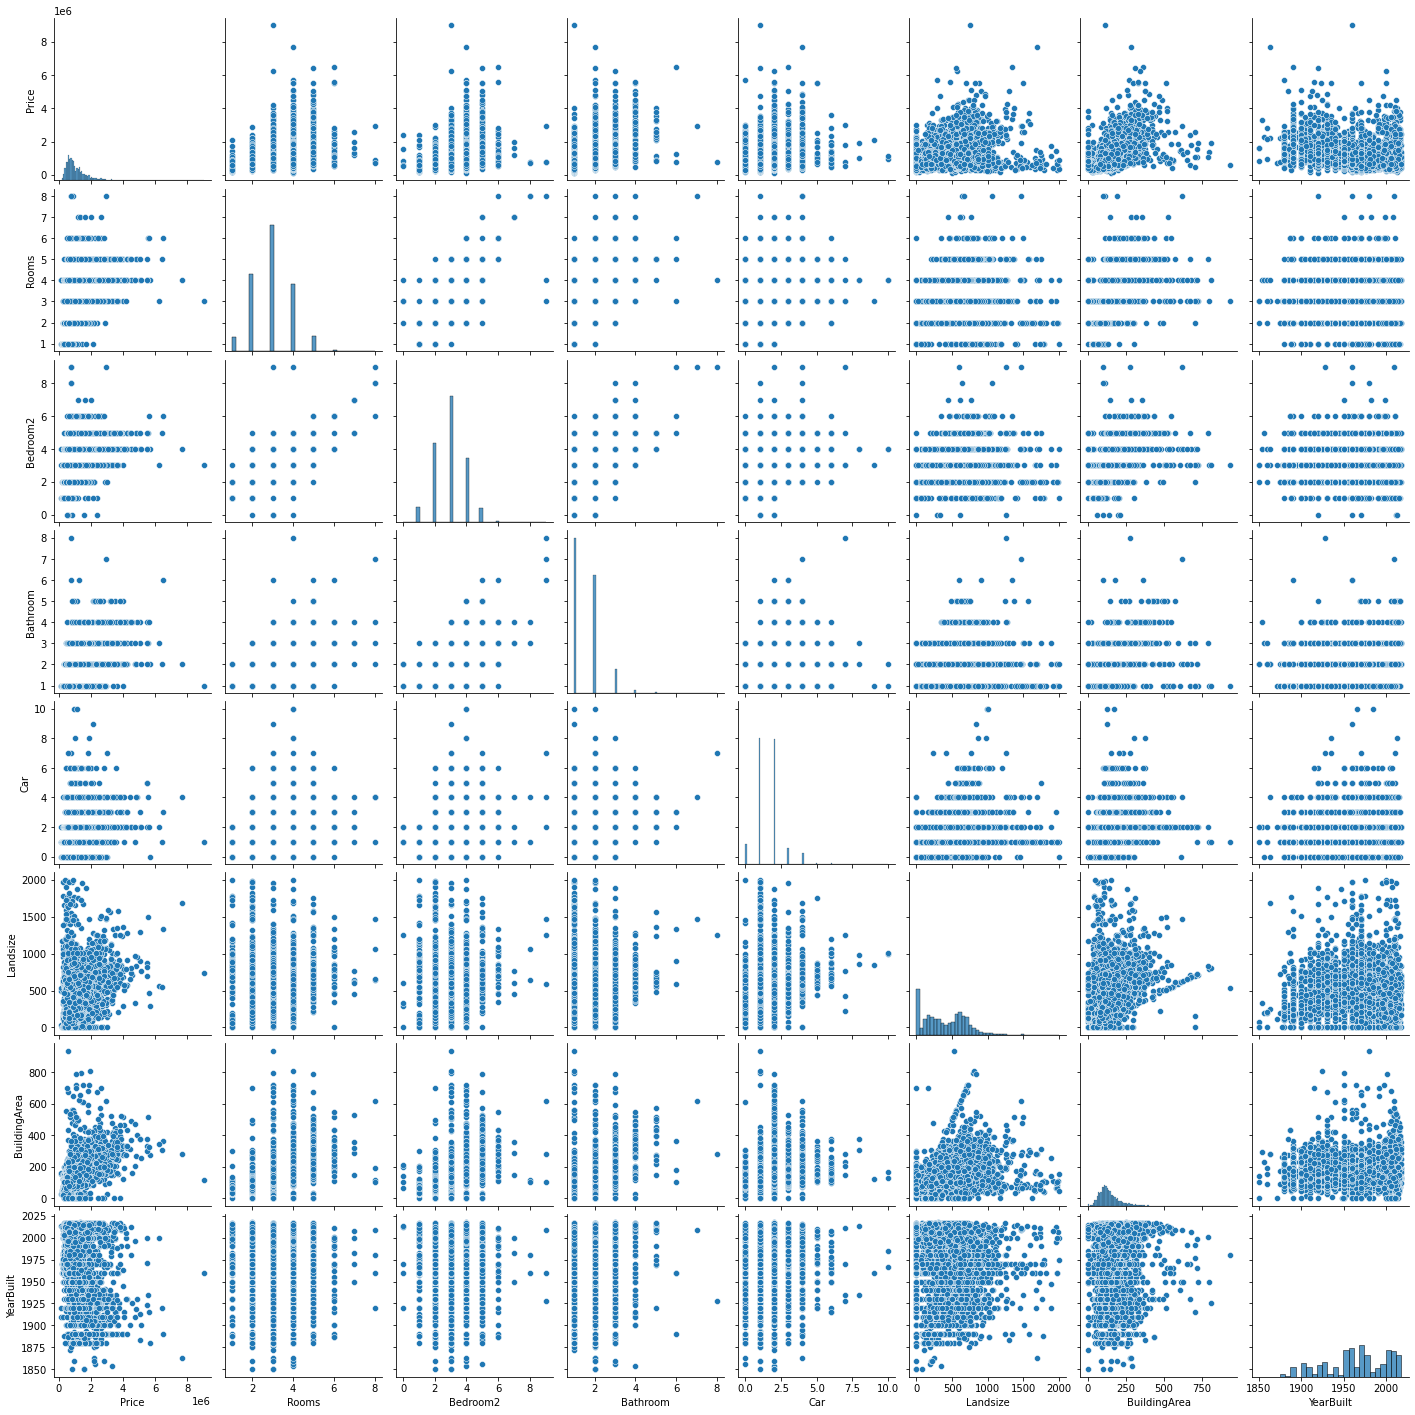

In [46]:
sns.pairplot(data)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']], data.Price, test_size=.2, random_state=1)

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lr.intercept_

13707504.859126557

In [52]:
lr.coef_

array([ 9.79096663e+04, -6.55085301e+04,  2.54603842e+05,  1.88583569e+04,
        1.21852268e+02,  3.03504909e+03, -6.94645384e+03])

In [53]:
y_pred = lr.predict(x_test)

In [70]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.r2_score(y_train, lr.predict(x_train)))

196298869627.55423
0.4981796148984263
